In [1]:
import functions as fx
import log_reg_functions as lrf
import loaddata as ld
import NeuralNetwork as nn
import LogisticRegression as lr

import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, f1_score, confusion_matrix, roc_auc_score

# A ) 


In [2]:
# Reading in credit card dataset.
x,y = ld.load_data(scaler='minmax')

# Using the total biased dataset. 
x_new, y_new = x,y

# B) 
Egen logistic regression med gradient descent.


In [24]:
eta = 0.1 # learning rate
Niter=2500
k=5
y_folds, x_folds = lrf.k_fold_reshaper(k,y_new,x_new,shuffle=True)


norm = np.zeros([2,2])
accuracy_train = float()
accuracy_test = float()
f1_train = float()
f1_test = float()
for i in range(k):
    xtrain = x_folds[np.arange(len(x_folds))!=i]      # Featch all but the i-th element
    xtrain = np.concatenate(xtrain,axis=0)
    ytrain = y_folds[np.arange(len(y_folds))!=i]
    ytrain = np.concatenate(ytrain,axis=0)
    xtest  = x_folds[i]
    ytest  = y_folds[i]
    
    logreg = lr.LOGREG(eta=0.1, doplot = False, doprint=False)
    cost_test, cost_train, axis = logreg.fit(xtrain, ytrain, xtest, ytest, Niter, solver='gd')
    
    classified=logreg.predict(xtest)
    accuracy_test += 100*np.sum(classified==ytest)/len(classified)
    f1_test += f1_score(ytest, classified)
    norm += fx.norm_confusion_matrix(ytest, classified, normalize=True)
    
    classified=logreg.predict(xtrain)   
    accuracy_train += 100*np.sum(classified==ytrain)/len(classified)
    f1_train += f1_score(ytrain, classified)
    
# Normalising error and confusion matrices over k-folds
norm = norm/k
accuracy_train = accuracy_train/k
accuracy_test = accuracy_test/k
f1_train = f1_train/k
f1_test = f1_test/k


    

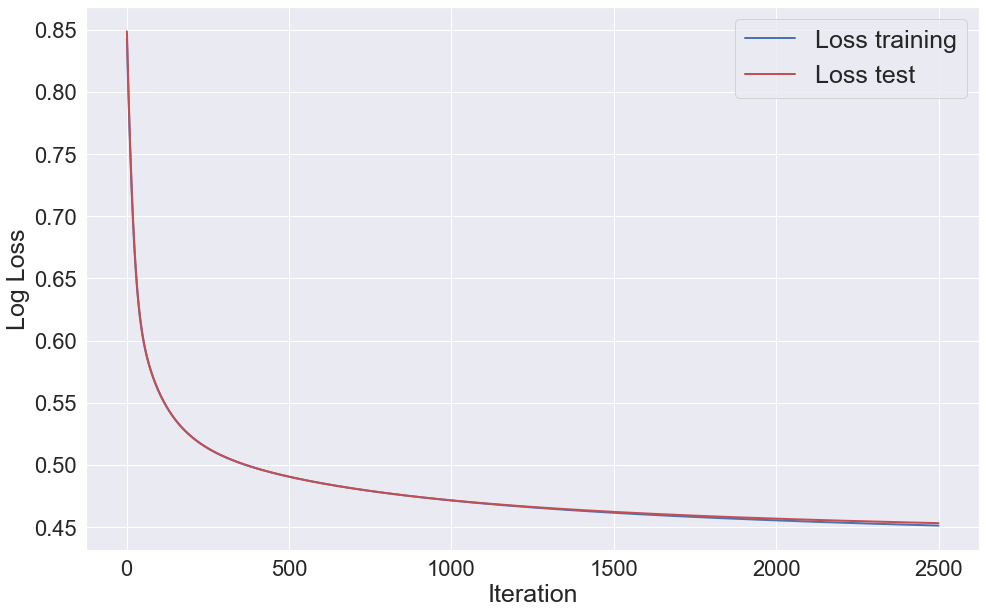

In [25]:
# Plotting the training and test loss for the k-th fold.
sns.set(font_scale=2)
plt.figure(figsize=([16,10]))
plt.plot(axis, cost_train, 'b', label='Loss training', linewidth=2)
plt.plot(axis, cost_test, 'r', label='Loss test', linewidth=2)
plt.legend(fontsize=25)
plt.ylabel('Log Loss',fontsize=25)
plt.xlabel('Iteration',fontsize=25)
plt.show()

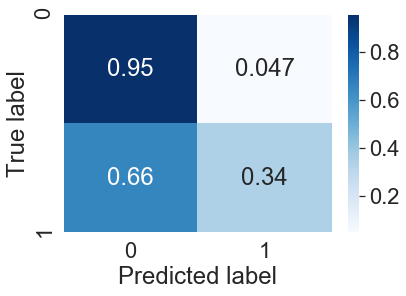

In [26]:
# plotting the normalized confusion matrix averaged over k folds
sns.set(font_scale=2)
fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show()      
     


# Accuracy. 
Både egen kode og tester med scikit. 

In [27]:
# Printing the accuracy metrics averaged over k folds. 
print(accuracy_train, '% Training accuracy')
print(accuracy_test, '% Test accuracy')
print(f1_train, '% Training f1 score')
print(f1_test, '% Test f1 score')

81.65166666666667 % Training accuracy
81.78666666666666 % Test accuracy
0.4481099764310935 % Training f1 score
0.4534551932069286 % Test f1 score


# Egen logistisk regresjon med stokastisk gradient descent

In [28]:
eta = 0.1 # learning rate
Niter=2500
k=5
y_folds, x_folds = lrf.k_fold_reshaper(k,y_new,x_new,shuffle=True)


norm = np.zeros([2,2])
accuracy_train = float()
accuracy_test = float()
f1_train = float()
f1_test = float()
for i in range(k):
    xtrain = x_folds[np.arange(len(x_folds))!=i]      # Featch all but the i-th element
    xtrain = np.concatenate(xtrain,axis=0)
    ytrain = y_folds[np.arange(len(y_folds))!=i]
    ytrain = np.concatenate(ytrain,axis=0)
    xtest  = x_folds[i]
    ytest  = y_folds[i]
    
    logreg = lr.LOGREG(eta=0.1, doplot = False, doprint=False)
    cost_test, cost_train, axis = logreg.fit(xtrain, ytrain, xtest, ytest, Niter, batch_size=int(len(y_new)/20), solver='sgd')
    
    classified=logreg.predict(xtest)
    accuracy_test += 100*np.sum(classified==ytest)/len(classified)
    f1_test += f1_score(ytest, classified)
    norm += fx.norm_confusion_matrix(ytest, classified, normalize=True)
    
    classified=logreg.predict(xtrain)   
    accuracy_train += 100*np.sum(classified==ytrain)/len(classified)
    f1_train += f1_score(ytrain, classified)

# Normalising error and confusion matrices over k-folds
norm = norm/k
accuracy_train = accuracy_train/k
accuracy_test = accuracy_test/k
f1_train = f1_train/k
f1_test = f1_test/k

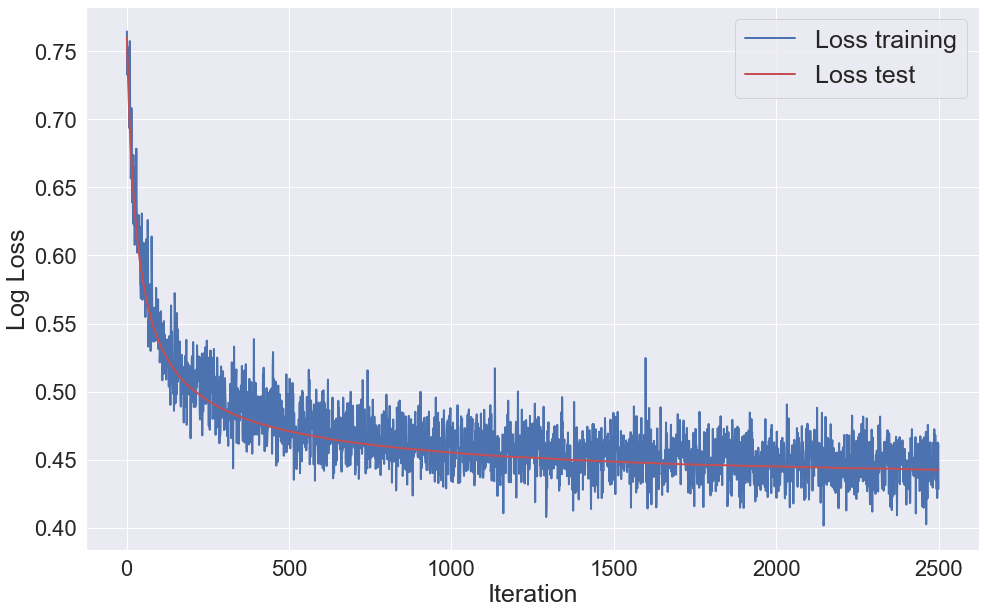

In [29]:
# plotting the normalized confusion matrix averaged over k folds
plt.figure(figsize=([16,10]))
plt.plot(axis, cost_train, 'b', label='Loss training', linewidth=2)
plt.plot(axis, cost_test, 'r', label='Loss test', linewidth=2)
plt.legend(fontsize=25)
plt.ylabel('Log Loss',fontsize=25)
plt.xlabel('Iteration',fontsize=25)
plt.show()

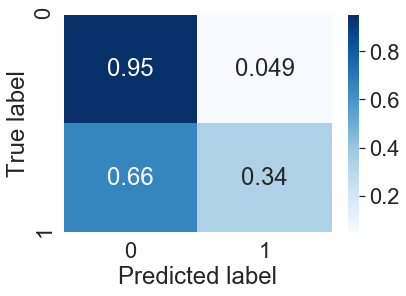

In [30]:
# plotting the normalized confusion matrix averaged over k folds
sns.set(font_scale=2)
fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show()

In [31]:
# Printing the accuracy metrics averaged over k folds. 
print(accuracy_train, '% Training accuracy')
print(accuracy_test, '% Test accuracy')
print(f1_train, '% Training f1 score')
print(f1_test, '% Test f1 score')

81.77916666666667 % Training accuracy
81.68333333333334 % Test accuracy
0.4589619214768721 % Training f1 score
0.4539321354850253 % Test f1 score


In [32]:
# comparing with scikit learn
model = LogisticRegression()
model.fit(xtrain, ytrain)
predicted_classes = model.predict(xtrain)
accuracy = accuracy_score(ytrain.flatten(),predicted_classes)
accuracy = accuracy * 100
parameters = model.coef_

print(accuracy, '% Training Accuracy')


predicted_classes = model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),predicted_classes)
accuracy = accuracy * 100
parameters = model.coef_

print(accuracy, '% Test Accuracy')

C:\Users\vemundst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vemundst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


82.13333333333334 % Training Accuracy
82.36666666666666 % Test Accuracy


# C) 
Neural Network. 

In [4]:
# Grid search to find best values for lambda and eta.
epochs=1000
batch_size=int(len(ytrain)/20)
n_features=x.shape[1]
etavec = np.logspace(-6, -1, 6)
lmbvec = np.logspace(-6, -1, 6)
lmbvec[0]=0

# defining the activation functions
activation = [lrf.relu, lrf.sigmoid, lrf.sigmoid]
derivative = [lrf.relu_deriv, lrf.sigmoid_deriv, lrf.sigmoid_deriv]


k=5
y_folds, x_folds = lrf.k_fold_reshaper(k,y_new,x_new,shuffle=True)


train_accuracy = np.zeros((len(etavec), len(lmbvec)))
norm = np.zeros([2,2])
accuracy_train = np.zeros((len(etavec), len(lmbvec)))
accuracy_test = np.zeros((len(etavec), len(lmbvec)))
f1_train = np.zeros((len(etavec), len(lmbvec)))
f1_test = np.zeros((len(etavec), len(lmbvec)))
test_loss = np.zeros((len(etavec), len(lmbvec)))
test_f1 = np.zeros((len(etavec), len(lmbvec)))
for i, etas in enumerate(etavec):
    for j, lmb in enumerate(lmbvec):
        
        for kf in range(k):
            xtrain = x_folds[np.arange(len(x_folds))!=kf]      # Featch all but the i-th element
            xtrain = np.concatenate(xtrain,axis=0)
            ytrain = y_folds[np.arange(len(y_folds))!=kf]
            ytrain = np.concatenate(ytrain,axis=0)
            xtest  = x_folds[kf]
            ytest  = y_folds[kf]
            
            np.random.seed(2019) # keep this constant to initialize weights equally.
            # Creating the network and defining hyperparamters
            neural_net = nn.ANN(lmb=lmb, bias=0, eta=etas,early_stop_tol = 10e-04,\
                                early_stop_nochange=200, mode = 'classification', regularization = 'l2')
            # Adding layers
            neural_net.add_layers(n_features=[91,50,20], n_neurons = [50,20,1] , n_layers=3)
            # Training network
            neural_net.train(epochs, batch_size, xtrain,ytrain,activation,derivative \
                             ,xtest,ytest, verbose=False)

            pred = neural_net.feed_out(xtest, activation)
            test_loss[i,j] +=  lrf.cost_log_ols(pred.ravel(),ytest.T)
            test_f1[i,j] +=  f1_score(ytest, np.round(pred))           
            
            classified=np.round(pred)
            
            accuracy_test[i,j] += 100*np.sum(classified==ytest)/len(classified)
            f1_test[i,j] += f1_score(ytest, classified)
            norm += fx.norm_confusion_matrix(ytest, classified, normalize=True)
            
            classified=np.round(neural_net.feed_out(xtrain, activation))   
            accuracy_train[i,j] += 100*np.sum(classified==ytrain)/len(classified)
            f1_train[i,j] += f1_score(ytrain, classified)
        print('test loss for', '\u03B7 =', etas, '&', '\u03BB =', lmb, '=', test_loss [i,j]/k)

# Average performance metrics over k folds
norm = norm/k
accuracy_train = accuracy_train/k
accuracy_test = accuracy_test/k
f1_train = f1_train/k
f1_test = f1_test/k
test_loss = test_loss/k


test loss for η = 1e-06 & λ = 0.0 = 0.8391297373017578
test loss for η = 1e-06 & λ = 1e-05 = 0.8391297372384334
test loss for η = 1e-06 & λ = 0.0001 = 0.8391297366685182
test loss for η = 1e-06 & λ = 0.001 = 0.8391297309696295
test loss for η = 1e-06 & λ = 0.01 = 0.8391296740073205
test loss for η = 1e-06 & λ = 0.1 = 0.8391291070412571
test loss for η = 1e-05 & λ = 0.0 = 0.8380236074781078
test loss for η = 1e-05 & λ = 1e-05 = 0.8380236071618843
test loss for η = 1e-05 & λ = 0.0001 = 0.8380236043161308
test loss for η = 1e-05 & λ = 0.001 = 0.8380235758841978
test loss for η = 1e-05 & λ = 0.01 = 0.8380232941245336
test loss for η = 1e-05 & λ = 0.1 = 0.8380207319979629


C:\Users\vemundst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


test loss for η = 0.0001 & λ = 0.0 = 0.7995993431181466
test loss for η = 0.0001 & λ = 1e-05 = 0.7995997496309089
test loss for η = 0.0001 & λ = 0.0001 = 0.7996034082496155
test loss for η = 0.0001 & λ = 0.001 = 0.7996399948016422
test loss for η = 0.0001 & λ = 0.01 = 0.8000058830552594
test loss for η = 0.0001 & λ = 0.1 = 0.8036517681992456
test loss for η = 0.001 & λ = 0.0 = 0.7618475652670982
test loss for η = 0.001 & λ = 1e-05 = 0.7618540516578199
test loss for η = 0.001 & λ = 0.0001 = 0.7618828747527602
test loss for η = 0.001 & λ = 0.001 = 0.7622061959631432
test loss for η = 0.001 & λ = 0.01 = 0.7651458126900923
test loss for η = 0.001 & λ = 0.1 = 0.7831058770418293
test loss for η = 0.01 & λ = 0.0 = 0.7596894024762029
test loss for η = 0.01 & λ = 1e-05 = 0.7596944724872471
test loss for η = 0.01 & λ = 0.0001 = 0.7597615920149117
test loss for η = 0.01 & λ = 0.001 = 0.760188550578342
test loss for η = 0.01 & λ = 0.01 = 0.7638036401454007
test loss for η = 0.01 & λ = 0.1 = 0.7665

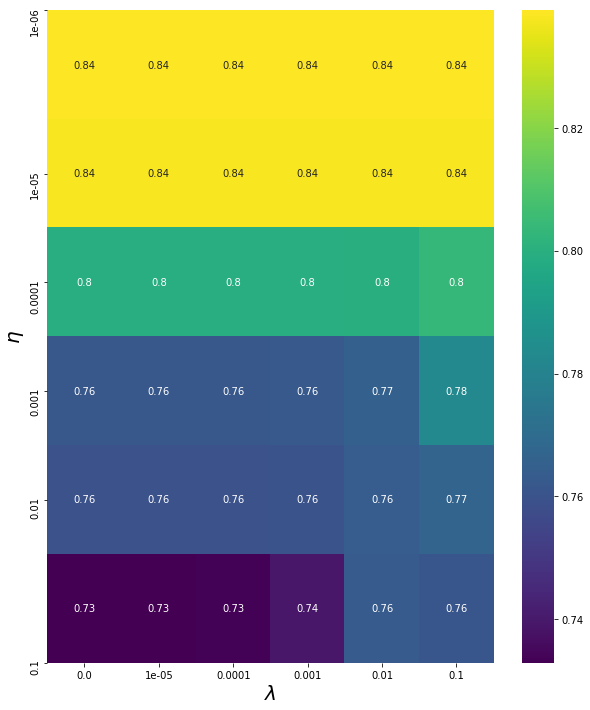

In [5]:
yticklabels = etavec
xticklabels = lmbvec
fig, ax = plt.subplots(figsize = (10, 12))
sns.heatmap(test_loss, annot=True, ax=ax, cmap="viridis",\
            yticklabels=yticklabels, xticklabels=xticklabels)
#ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$", fontsize=20)
ax.set_xlabel("$\lambda$", fontsize=20)
tmp = np.arange(len(etavec))+0.5
tmp[0] = 0
tmp[-1]+=0.5
ax.set_yticks(tmp)
tmp = np.arange(len(lmbvec)) + 0.5
ax.set_xticks(tmp)
plt.show()

In [6]:
# Extract optimal parameters. 
best_eta_index, best_lmb_index = np.where(test_loss == np.min(test_loss))
best_eta,best_lmb = etavec[best_eta_index], lmbvec[best_lmb_index] 
print('eta=',best_eta)
print('lmb=',best_lmb)

eta= [0.1]
lmb= [0.]


In [7]:
epochs=1000

best_eta = 0.1 # 0.001 is a minimum, but not the one we are aiming for :))

norm = np.zeros([2,2])
accuracy_test = 0
f1_test = 0 
accuracy_train = 0
f1_train = 0 
for kf in range(k):
    xtrain = x_folds[np.arange(len(x_folds))!=kf]      # Featch all but the i-th element
    xtrain = np.concatenate(xtrain,axis=0)
    ytrain = y_folds[np.arange(len(y_folds))!=kf]
    ytrain = np.concatenate(ytrain,axis=0)
    xtest  = x_folds[kf]
    ytest  = y_folds[kf]
            
    np.random.seed(2019)
    neural_net = nn.ANN(lmb=best_lmb, bias=0, eta=best_eta,early_stop_tol = 0,\
                                early_stop_nochange=200, mode = 'classification', regularization = 'l1')            
    neural_net.add_layers(n_features=[91,50,20], n_neurons = [50,20,1] , n_layers=3)

    neural_net.train(epochs, batch_size, xtrain,ytrain,activation,derivative \
                             ,xtest,ytest, verbose=True)

    pred = neural_net.feed_out(xtest, activation)
    test_loss[i,j] +=  lrf.cost_log_ols(pred.ravel(),ytest.T)
    test_f1[i,j] +=  f1_score(ytest, np.round(pred))           
            
    classified=np.round(pred)
            
    accuracy_test += 100*np.sum(classified==ytest)/len(classified)
    f1_test += f1_score(ytest, classified)
    norm += fx.norm_confusion_matrix(ytest, classified, normalize=True)
            
    classified=np.round(neural_net.feed_out(xtrain, activation))   
    accuracy_train += 100*np.sum(classified==ytrain)/len(classified)
    f1_train += f1_score(ytrain, classified)
    
norm = norm/k
accuracy_train = accuracy_train/k
accuracy_test = accuracy_test/k
f1_train = f1_train/k
f1_test = f1_test/k
test_loss = test_loss/k
cost_test, cost_train = neural_net.costs()

Epoch 1 loss 0.7986553010561244
Epoch 2 loss 0.7814327396551652
Epoch 3 loss 0.7728262278774292
Epoch 4 loss 0.7677511389474284
Epoch 5 loss 0.764252182235576
Epoch 6 loss 0.762543697649609
Epoch 7 loss 0.7612442277307854
Epoch 8 loss 0.7604131248508993
Epoch 9 loss 0.7601010571830663
Epoch 10 loss 0.7599190463345714
Epoch 11 loss 0.7594574619954768
Epoch 12 loss 0.7595426918590098
Epoch 13 loss 0.7594468461767773
Epoch 14 loss 0.7587018597921199
Epoch 15 loss 0.7590896292583704
Epoch 16 loss 0.7587812679212345
Epoch 17 loss 0.7584516624888504
Epoch 18 loss 0.758310664830381
Epoch 19 loss 0.7595467045881094
Epoch 20 loss 0.7594854392047166
Epoch 21 loss 0.759747250675527
Epoch 22 loss 0.7596573910574855
Epoch 23 loss 0.7592641478095581
Epoch 24 loss 0.758822586405811
Epoch 25 loss 0.7587141751029197
Epoch 26 loss 0.7584571976907953
Epoch 27 loss 0.7584232838111385
Epoch 28 loss 0.7585558016126003
Epoch 29 loss 0.7584490789909908
Epoch 30 loss 0.7583671061689735
Epoch 31 loss 0.75826183

Epoch 247 loss 0.7349997797740239
Epoch 248 loss 0.7341302881489926
Epoch 249 loss 0.7341963290676319
Epoch 250 loss 0.7344238595523263
Epoch 251 loss 0.7345191296860449
Epoch 252 loss 0.7342725363977729
Epoch 253 loss 0.7346056896813941
Epoch 254 loss 0.7339604624924725
Epoch 255 loss 0.7336735914031733
Epoch 256 loss 0.7338475492792778
Epoch 257 loss 0.7337772255034971
Epoch 258 loss 0.7337987158000865
Epoch 259 loss 0.7343350765880569
Epoch 260 loss 0.7343675338506194
Epoch 261 loss 0.7342144875109561
Epoch 262 loss 0.7342635071670172
Epoch 263 loss 0.7340975805893258
Epoch 264 loss 0.7340947692335797
Epoch 265 loss 0.7343788474442872
Epoch 266 loss 0.734314085061083
Epoch 267 loss 0.7344015050532837
Epoch 268 loss 0.7342656534055885
Epoch 269 loss 0.734188820162939
Epoch 270 loss 0.7342660754161617
Epoch 271 loss 0.7344254812767693
Epoch 272 loss 0.7345389545085065
Epoch 273 loss 0.7344880304051321
Epoch 274 loss 0.7342034796327601
Epoch 275 loss 0.7343208810314596
Epoch 276 loss 0

Epoch 489 loss 0.7326460518680713
Epoch 490 loss 0.7326912175395673
Epoch 491 loss 0.7324322045359463
Epoch 492 loss 0.7323078533139261
Epoch 493 loss 0.7321330658625266
Epoch 494 loss 0.731768124031756
Epoch 495 loss 0.7315499613168386
Epoch 496 loss 0.7315277919223993
Epoch 497 loss 0.7314777397067369
Epoch 498 loss 0.7313135868897053
Epoch 499 loss 0.7313607547150157
Epoch 500 loss 0.7312855272424535
Epoch 501 loss 0.7313687144695797
Epoch 502 loss 0.7313612599932275
Epoch 503 loss 0.7314601155143702
Epoch 504 loss 0.7316482206775929
Epoch 505 loss 0.7317705093311271
Epoch 506 loss 0.7319297395080364
Epoch 507 loss 0.7316657449647813
Epoch 508 loss 0.7317698830838006
Epoch 509 loss 0.7323620968995023
Epoch 510 loss 0.7323438643986061
Epoch 511 loss 0.7315583049980281
Epoch 512 loss 0.7316206876243727
Epoch 513 loss 0.7317212007976546
Epoch 514 loss 0.7315959437384507
Epoch 515 loss 0.7315828224410348
Epoch 516 loss 0.7313792377786082
Epoch 517 loss 0.7312500567137822
Epoch 518 loss 

Epoch 137 loss 0.7435887104765392
Epoch 138 loss 0.7435369071402953
Epoch 139 loss 0.743123970668023
Epoch 140 loss 0.7427569081547908
Epoch 141 loss 0.7427085940141263
Epoch 142 loss 0.7427920060820395
Epoch 143 loss 0.7426221296552643
Epoch 144 loss 0.7424605689243835
Epoch 145 loss 0.7422142370906918
Epoch 146 loss 0.7420020986550863
Epoch 147 loss 0.7418729432925432
Epoch 148 loss 0.7418058650019647
Epoch 149 loss 0.7417112964281939
Epoch 150 loss 0.7419236678061915
Epoch 151 loss 0.7420734642880945
Epoch 152 loss 0.7416961910440735
Epoch 153 loss 0.7418962778212504
Epoch 154 loss 0.7416771985077291
Epoch 155 loss 0.7414435871595204
Epoch 156 loss 0.7413804769062683
Epoch 157 loss 0.7414723755376701
Epoch 158 loss 0.7419922170914662
Epoch 159 loss 0.7414612628785037
Epoch 160 loss 0.7410176038827434
Epoch 161 loss 0.7410102906593151
Epoch 162 loss 0.7407237246104672
Epoch 163 loss 0.7409152820027137
Epoch 164 loss 0.7406600397370072
Epoch 165 loss 0.7405513553146943
Epoch 166 loss 

Epoch 379 loss 0.7346095145553404
Epoch 380 loss 0.7349518781771708
Epoch 381 loss 0.7345695368478029
Epoch 382 loss 0.7345886428145411
Epoch 383 loss 0.7344578510126876
Epoch 384 loss 0.7341195079747431
Epoch 385 loss 0.7339558782187124
Epoch 386 loss 0.7343404983908325
Epoch 387 loss 0.7340318454075646
Epoch 388 loss 0.7340998019700303
Epoch 389 loss 0.7342249514577815
Epoch 390 loss 0.7343035482183036
Epoch 391 loss 0.7341780755807129
Epoch 392 loss 0.7338896685501815
Epoch 393 loss 0.7338815321418186
Epoch 394 loss 0.7336578761771125
Epoch 395 loss 0.734352817958785
Epoch 396 loss 0.734209728087265
Epoch 397 loss 0.7341335044603094
Epoch 398 loss 0.7344842752212368
Epoch 399 loss 0.7346495575956753
Epoch 400 loss 0.7341372998144675
Epoch 401 loss 0.734307129190052
Epoch 402 loss 0.734083027771129
Epoch 403 loss 0.7340651433821486
Epoch 404 loss 0.7340334868617647
Epoch 405 loss 0.7339374153612137
Epoch 406 loss 0.7344522606786037
Epoch 407 loss 0.7337084515923494
Epoch 408 loss 0.7

Epoch 90 loss 0.7497113576783954
Epoch 91 loss 0.7494420433419913
Epoch 92 loss 0.7492064463980842
Epoch 93 loss 0.7491874694681476
Epoch 94 loss 0.7493561116243668
Epoch 95 loss 0.7483005562412427
Epoch 96 loss 0.7485362724007852
Epoch 97 loss 0.7483803826769789
Epoch 98 loss 0.7479904870251228
Epoch 99 loss 0.7479255666196575
Epoch 100 loss 0.7481370880924474
Epoch 101 loss 0.747743163740296
Epoch 102 loss 0.7480775600966736
Epoch 103 loss 0.747086045846115
Epoch 104 loss 0.7467722966411656
Epoch 105 loss 0.746541932535743
Epoch 106 loss 0.7457307817475999
Epoch 107 loss 0.7454542217081811
Epoch 108 loss 0.7455836501732235
Epoch 109 loss 0.7454860125367284
Epoch 110 loss 0.7459347426859347
Epoch 111 loss 0.7456478538957308
Epoch 112 loss 0.7450906159061037
Epoch 113 loss 0.7450664326403856
Epoch 114 loss 0.7448131628743964
Epoch 115 loss 0.7448844895328738
Epoch 116 loss 0.744487683731765
Epoch 117 loss 0.7444761300978159
Epoch 118 loss 0.7443693027371987
Epoch 119 loss 0.74421031727

Epoch 333 loss 0.7329061044778221
Epoch 334 loss 0.7326682673347107
Epoch 335 loss 0.7326758124492078
Epoch 336 loss 0.732443672025139
Epoch 337 loss 0.7323306889868821
Epoch 338 loss 0.7320464030937042
Epoch 339 loss 0.7321517048424546
Epoch 340 loss 0.7325107851406565
Epoch 341 loss 0.732172995053909
Epoch 342 loss 0.7325959566618259
Epoch 343 loss 0.7322830493721938
Epoch 344 loss 0.7323375748993993
Epoch 345 loss 0.7323205513245542
Epoch 346 loss 0.7325680572074158
Epoch 347 loss 0.7325500766504768
Epoch 348 loss 0.7326876058557829
Epoch 349 loss 0.732819863514059
Epoch 350 loss 0.7327243981381873
Epoch 351 loss 0.7330856193891312
Epoch 352 loss 0.7329702807692673
Epoch 353 loss 0.7329075347311135
Epoch 354 loss 0.7331318514396229
Epoch 355 loss 0.7329728126750202
Epoch 356 loss 0.733005903242698
Epoch 357 loss 0.732642767353275
Epoch 358 loss 0.7331446596232718
Epoch 359 loss 0.7333039271724108
Epoch 360 loss 0.7331076336191937
Epoch 361 loss 0.732809112539127
Epoch 362 loss 0.732

Epoch 575 loss 0.7314694882278506
Epoch 576 loss 0.7318786618967599
Epoch 577 loss 0.7316622308201226
Epoch 578 loss 0.731357578103741
Epoch 579 loss 0.7312707323809956
Epoch 580 loss 0.7310442376577807
Epoch 581 loss 0.73132427830346
Epoch 582 loss 0.731332877495074
Epoch 583 loss 0.731333238430012
Epoch 584 loss 0.731413172427084
Epoch 585 loss 0.731747728226322
Epoch 586 loss 0.7314845792916417
Epoch 587 loss 0.7314030361725037
Epoch 588 loss 0.7315034360021581
Epoch 589 loss 0.7314758296213522
Epoch 590 loss 0.7309775610985678
Epoch 591 loss 0.7308642023989639
Epoch 592 loss 0.7312241910372218
Epoch 593 loss 0.7310122032658972
Epoch 594 loss 0.7306867763694583
Epoch 595 loss 0.7315759028429089
Epoch 596 loss 0.7311935560853171
Epoch 597 loss 0.731366046714604
Epoch 598 loss 0.7314348050804207
Epoch 599 loss 0.7314434624672279
Epoch 600 loss 0.7317717941538987
Epoch 601 loss 0.7317994697806307
Epoch 602 loss 0.7318911386339381
Epoch 603 loss 0.7321555761485765
Epoch 604 loss 0.73192

Epoch 217 loss 0.7331755844008074
Epoch 218 loss 0.7333682451252116
Epoch 219 loss 0.733383568216525
Epoch 220 loss 0.7333470567499821
Epoch 221 loss 0.7329494369108946
Epoch 222 loss 0.7331697183474897
Epoch 223 loss 0.7330224625177213
Epoch 224 loss 0.7330668549437914
Epoch 225 loss 0.7333793388166017
Epoch 226 loss 0.7326938449568997
Epoch 227 loss 0.7331554583107295
Epoch 228 loss 0.7333222907711933
Epoch 229 loss 0.7332991107399706
Epoch 230 loss 0.7326866375420426
Epoch 231 loss 0.7332853220483396
Epoch 232 loss 0.7335755607622878
Epoch 233 loss 0.7336704300802726
Epoch 234 loss 0.7335055465573358
Epoch 235 loss 0.7332043297556438
Epoch 236 loss 0.7330467214698991
Epoch 237 loss 0.7328916564118311
Epoch 238 loss 0.7328380293983182
Epoch 239 loss 0.7330910368821164
Epoch 240 loss 0.732881353886132
Epoch 241 loss 0.7330963875338992
Epoch 242 loss 0.733231272253144
Epoch 243 loss 0.7330610911982035
Epoch 244 loss 0.7330130786707559
Epoch 245 loss 0.7329247035064477
Epoch 246 loss 0.

Epoch 459 loss 0.730215340086792
Epoch 460 loss 0.7302157637253096
Epoch 461 loss 0.7302217238445265
Epoch 462 loss 0.7303685349676666
Epoch 463 loss 0.7305380956374429
Epoch 464 loss 0.7302070804847732
Epoch 465 loss 0.7303853122823986
Epoch 466 loss 0.7299950132803041
Epoch 467 loss 0.7302524114362325
Epoch 468 loss 0.7300834418197328
Epoch 469 loss 0.7305165561679289
Epoch 470 loss 0.7306403101371122
Epoch 471 loss 0.7306156467906667
Epoch 472 loss 0.7305401957876227
Epoch 473 loss 0.7306415044017143
Epoch 474 loss 0.7302242548833047
Epoch 475 loss 0.7302357375065663
Epoch 476 loss 0.7299217859842535
Epoch 477 loss 0.7302997822235633
Epoch 478 loss 0.7301230008013985
Epoch 479 loss 0.7301653269253484
Epoch 480 loss 0.7304033160546697
Epoch 481 loss 0.7301114092145651
Epoch 482 loss 0.7298701831387944
Epoch 483 loss 0.7306117631585057
Epoch 484 loss 0.7306220764336007
Epoch 485 loss 0.730494100730976
Epoch 486 loss 0.730438906943838
Epoch 487 loss 0.7301832408888446
Epoch 488 loss 0.

Epoch 101 loss 0.7494933994689925
Epoch 102 loss 0.7494050148464058
Epoch 103 loss 0.749097172289179
Epoch 104 loss 0.7488763041740841
Epoch 105 loss 0.7484478237293157
Epoch 106 loss 0.747912215185721
Epoch 107 loss 0.7475576102511736
Epoch 108 loss 0.7476029712173763
Epoch 109 loss 0.747138735980721
Epoch 110 loss 0.7470666924390261
Epoch 111 loss 0.7471221577305975
Epoch 112 loss 0.7472303558604795
Epoch 113 loss 0.7475566680628127
Epoch 114 loss 0.7475313753753868
Epoch 115 loss 0.747140376977317
Epoch 116 loss 0.7464826269689747
Epoch 117 loss 0.7464438013465565
Epoch 118 loss 0.7467719825611517
Epoch 119 loss 0.7460155060578478
Epoch 120 loss 0.7460914874706587
Epoch 121 loss 0.7459219316952699
Epoch 122 loss 0.7453269561113632
Epoch 123 loss 0.7453008140337558
Epoch 124 loss 0.7452511889805628
Epoch 125 loss 0.7448502095593341
Epoch 126 loss 0.7447965957951838
Epoch 127 loss 0.744700844165468
Epoch 128 loss 0.7452095951911595
Epoch 129 loss 0.7446372144177473
Epoch 130 loss 0.74

Epoch 343 loss 0.7341624022946011
Epoch 344 loss 0.734383974778459
Epoch 345 loss 0.7339161683269306
Epoch 346 loss 0.7343105399610025
Epoch 347 loss 0.7340922881580906
Epoch 348 loss 0.7343369803377993
Epoch 349 loss 0.7343409725766374
Epoch 350 loss 0.7343193085959817
Epoch 351 loss 0.7345092661134054
Epoch 352 loss 0.7346409761480457
Epoch 353 loss 0.7342680114524613
Epoch 354 loss 0.7346030798815687
Epoch 355 loss 0.7345929806807466
Epoch 356 loss 0.7345057493536217
Epoch 357 loss 0.7344212137414233
Epoch 358 loss 0.7345489165003061
Epoch 359 loss 0.7344316831051604
Epoch 360 loss 0.734787555874052
Epoch 361 loss 0.7342781950740956
Epoch 362 loss 0.734533168307468
Epoch 363 loss 0.7344699403459541
Epoch 364 loss 0.7339437394756789
Epoch 365 loss 0.734233561819
Epoch 366 loss 0.7339432717258565
Epoch 367 loss 0.7345692193915572
Epoch 368 loss 0.7342992658622337
Epoch 369 loss 0.7342230667315774
Epoch 370 loss 0.7340875687978833
Epoch 371 loss 0.7345868404880178
Epoch 372 loss 0.7344

Epoch 585 loss 0.7332511458545417
Epoch 586 loss 0.7331698485025989
Epoch 587 loss 0.7329902704413722
Epoch 588 loss 0.7331434572213315
Epoch 589 loss 0.7331569781523279
Epoch 590 loss 0.7332005022571648
Epoch 591 loss 0.7329158545371529
Epoch 592 loss 0.732963897348898
Epoch 593 loss 0.732775976390129
Epoch 594 loss 0.7328425699411871
Epoch 595 loss 0.7328991096255337
Epoch 596 loss 0.7328477083946521
Epoch 597 loss 0.7329612424162
Epoch 598 loss 0.7330181657501863
Epoch 599 loss 0.7327322582714192
Epoch 600 loss 0.7331669868522328
Epoch 601 loss 0.7331687350152795
Epoch 602 loss 0.7334648808810805
Epoch 603 loss 0.7340491502332374
Epoch 604 loss 0.7335689953018577
Epoch 605 loss 0.7336798412453303
Epoch 606 loss 0.7329841006677108
Epoch 607 loss 0.7330872701023909
Epoch 608 loss 0.7329548799135445
Epoch 609 loss 0.7332384097846247
Epoch 610 loss 0.7328321302217955
Epoch 611 loss 0.7324331938659074
Epoch 612 loss 0.7327717557582497
Epoch 613 loss 0.7326579599096505
Epoch 614 loss 0.73

In [8]:
# Print scores
print(accuracy_train)
print(accuracy_test)
print(f1_train)
print(f1_test)

82.00999999999999
82.01333333333335
0.47909590759362686
0.4787901636283182


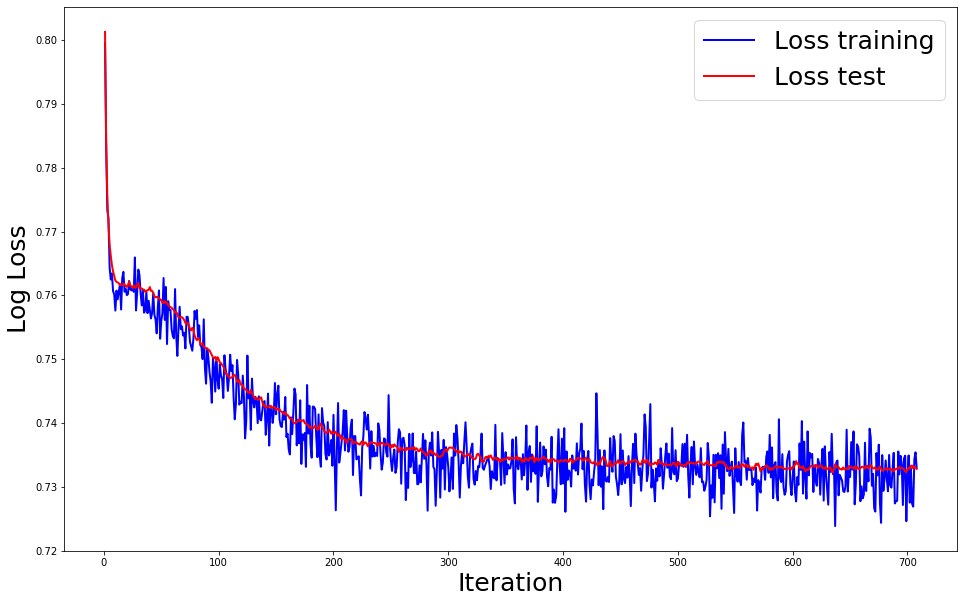

In [9]:
# Plot the loss for the k-th fold
cost_test, cost_train = neural_net.costs()
plt.figure(figsize=([16,10]))
axis = np.arange(len(cost_train))+1
plt.plot(axis, cost_train, 'b', label='Loss training', linewidth=2)
plt.plot(axis, cost_test, 'r', label='Loss test', linewidth=2)
plt.legend(fontsize=25)
plt.ylabel('Log Loss',fontsize=25)
plt.xlabel('Iteration',fontsize=25)
plt.show()

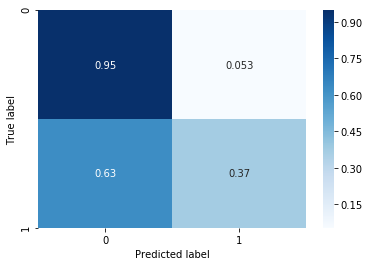

In [10]:
# plot confusion matrix averaged over k folds
fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show() 


In [11]:
# run same calculations with scikit learn. 
from sklearn.neural_network import MLPClassifier
# by default MLPClassifier employes l2 regularization


#print("Test set score: %f" % mlp.score(xtest, ytest))
epochs=1000
batch_size=500
n_features=x.shape[1]
etavec = np.logspace(-4, -1, 4)
lmbvec = np.logspace(-7, -3, 5)
lmbvec[0]=0


train_accuracy = np.zeros((len(etavec), len(lmbvec)))
for i, etas in enumerate(etavec):
    for j, lmb in enumerate(lmbvec):
        mlp = MLPClassifier(hidden_layer_sizes=(50,20,), max_iter=2000, alpha=lmb,
                    solver='sgd', verbose=0, tol=1e-4,batch_size=500, random_state=1,
                    learning_rate_init=etas)

        mlp.fit(xtrain, ytrain.ravel())
        print("Training set score: %f" % mlp.score(xval, yval))
        pred = mlp.predict(xval)
        train_accuracy[i,j] =  lrf.cost_log_ols(pred.ravel(),yval.T)
        print('Validation f1_score for', '\u03B7 =', etas, '&', '\u03BB =', lmb, '=', train_accuracy [i,j])



NameError: name 'xval' is not defined

In [ ]:
import seaborn as sns
train_accuracy[np.isnan(train_accuracy)]=2

yticklabels = etavec
xticklabels = lmbvec
fig, ax = plt.subplots(figsize = (10, 12))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis",\
            yticklabels=yticklabels, xticklabels=xticklabels)
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
tmp = np.arange(len(etavec))+0.5
tmp[0] = 0
tmp[-1]+=0.5
ax.set_yticks(tmp)
tmp = np.arange(len(lmbvec)) + 0.5
ax.set_xticks(tmp)
plt.show()

In [ ]:
pred = mlp.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),pred)
accuracy = accuracy * 100
print(accuracy)
print(f1_score(ytest, pred)) 

cm = confusion_matrix(ytest , pred)
print(cm)

In [ ]:
pred = mlp.predict(xtrain)
accuracy = accuracy_score(ytrain.flatten(),pred)
accuracy = accuracy * 100
print(accuracy)

cm = confusion_matrix(ytrain , pred)
print(cm)